# EDA

In [1]:
#importing Python libraries and dataset
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load clean dataset
df_eda = pd.read_csv('../data/pricingdata_cleaned.csv')

In [3]:
df_eda

id prices.availability prices.condition  \
0      AVphzgbJLJeJML43fA0o            In Stock              New   
1      AVpgMuGwLJeJML43KY_c            In Stock              New   
2      AVpgMuGwLJeJML43KY_c            In Stock              New   
3      AVpgMuGwLJeJML43KY_c            In Stock              New   
4      AVpgMuGwLJeJML43KY_c            In Stock              New   
...                     ...                 ...              ...   
13079  AVpgibRDLJeJML43PTZX            In Stock              New   
13080  AVpgibRDLJeJML43PTZX            In Stock              New   
13081  AVpgibRDLJeJML43PTZX            In Stock              New   
13082  AVpgibRDLJeJML43PTZX            In Stock              New   
13083  AVpgibRDLJeJML43PTZX            In Stock              New   

      prices.currency      prices.dateSeen  prices.isSale  \
0                 USD  2018-05-26 15:00:00          False   
1                 USD  2017-12-14 06:00:00           True   
2                 USD  2017-09-08 05:00:00          False   
3                 USD  2017-10-10 05:00:00          False   
4                 USD  2017-08-28 07:00:00          False   
...               ...                  ...            ...   
13079             USD  2015-10-18 00:00:00          False   
13080             USD  2017-12-14 06:00:00          False   
13081             USD  2018-05-26 15:00:00          False   
13082             USD  2018-03-05 11:00:00          False   
13083             USD  2015-12-05 00:00:00          False   

                     prices.merchant prices.shipping    brand  \
0                        Bestbuy.com         unknown    Sanus   
1                        Walmart.com       Expedited  Boytone   
2                        Walmart.com       Expedited  Boytone   
3                        Bestbuy.com         unknown  Boytone   
4                        Bestbuy.com         unknown  Boytone   
...                              ...             ...      ...   
13079  Beach Audio Inc - Walmart.com         unknown     naxa   
13080                    Walmart.com        Standard     naxa   
13081                    Bestbuy.com         unknown     naxa   
13082                    Walmart.com        Standard     naxa   
13083  Beach Audio Inc - Walmart.com         unknown     naxa   

                                              categories  ... DVDBurners  \
0      Audio&VideoAccessories,TVMounts,TVAccessories&...  ...          0   
1      Stereos,PortableBluetoothSpeakers,TV,Video&Hom...  ...          0   
2      Stereos,PortableBluetoothSpeakers,TV,Video&Hom...  ...          0   
3      Stereos,PortableBluetoothSpeakers,TV,Video&Hom...  ...          0   
4      Stereos,PortableBluetoothSpeakers,TV,Video&Hom...  ...          0   
...                                                  ...  ...        ...   
13079  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   
13080  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   
13081  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   
13082  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   
13083  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   

      Ipods&Mp3Players SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...  \
0                    0                                                  0   
1                    0                                                  0   
2                    0                                                  0   
3                    0                                                  0   
4                    0                                                  0   
...                ...                                                ...   
13079                0                                                  0   
13080                0                                                  0   
13081                0                                                  0   
13082      

In [4]:
#Identify categorical and numerical columns
categorical_columns = df_eda.select_dtypes(include=['object']).columns
numerical_columns = df_eda.select_dtypes(include=['float64', 'int64']).columns
print('Categorical Columns:', categorical_columns)
print('Numerical Columns:', numerical_columns)

Categorical Columns: Index(['id', 'prices.availability', 'prices.condition', 'prices.currency',
       'prices.dateSeen', 'prices.merchant', 'prices.shipping', 'brand',
       'categories', 'dateAdded', 'dateUpdated', 'name', 'primaryCategories'],
      dtype='object')
Numerical Columns: Index(['weight_pounds', 'prices.amountAvg', 'Audio&VideoAccessories',
       'TVMounts', 'TVAccessories&Parts', 'Electronics', 'A/VPresentation',
       'Accessories&Supplies', 'TVCeiling&WallMounts', 'Stereos',
       ...
       'DVDBurners', 'Ipods&Mp3Players',
       'SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...',
       'SeemoreUltimateEarsBOOM2PhantomPortableSpeaker...',
       'SeemoreSamsungLevelUProActiveNoiseCancellingWi...',
       'SeemoreJBLGX9633-Way6in.x9in.Speaker', 'BusinessLaptopPCs',
       'SoundReinforcementMixers', 'USBMixers', 'DJMixers'],
      dtype='object', length=2652)


In [5]:
#print the maximum and minimum value in price.amountAvg column
print('Minimum price:', df_eda['prices.amountAvg'].min())
print('Maximum price:', df_eda['prices.amountAvg'].max())



Minimum price: 1.0
Maximum price: 26871.0


In [6]:
#See outliers in the 'prices.amountAvg' column
df_eda['prices.amountAvg'].describe()


count    13084.000000
mean       502.485743
std        915.252506
min          1.000000
25%         79.990000
50%        198.000000
75%        508.992500
max      26871.000000
Name: prices.amountAvg, dtype: float64

In [7]:
# Calculate the z-scores of 'prices.amountAvg'
z_scores = (df_eda['prices.amountAvg'] - df_eda['prices.amountAvg'].mean()) / df_eda['prices.amountAvg'].std()
z_scores.abs().sort_values(ascending=False).head(10)


10029    28.810098
10690    21.302869
10691    21.302869
10692    21.300684
11123    20.209193
10693    18.025041
9851     13.649254
10060    12.562112
10062    11.688036
10063    11.688036
Name: prices.amountAvg, dtype: float64

In [8]:
# Calculate the IQR
Q1 = df_eda['prices.amountAvg'].quantile(0.25)
Q3 = df_eda['prices.amountAvg'].quantile(0.75)
IQR = Q3 - Q1
IQR

429.0025

In [9]:
# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [10]:
# Filter the rows with outliers
outliers = df_eda[(df_eda['prices.amountAvg'] < lower_bound) | (df_eda['prices.amountAvg'] > upper_bound)]
outliers

id prices.availability prices.condition  \
703    AVpf4W5_ilAPnD_xj6lg            In Stock              New   
705    AVpf4W5_ilAPnD_xj6lg            In Stock              New   
711    AVpf4W5_ilAPnD_xj6lg            In Stock              New   
712    AVpf4W5_ilAPnD_xj6lg     More on the Way              New   
714    AVpf4W5_ilAPnD_xj6lg            In Stock              New   
...                     ...                 ...              ...   
12437  AV1YHofAGV-KLJ3addLV            In Stock              New   
12438  AV1YHofAGV-KLJ3addLV            In Stock              New   
12439  AV1YHofAGV-KLJ3addLV            In Stock              New   
12604  AVpgsFof1cnluZ0-5DPl            In Stock              New   
12662  AVzxmAkQglJLPUi8G1Ku            In Stock              New   

      prices.currency      prices.dateSeen  prices.isSale   prices.merchant  \
703               USD  2018-03-30 21:00:00           True  bhphotovideo.com   
705               USD  2018-06-04 14:00:00          False  bhphotovideo.com   
711               USD  2018-05-26 15:00:00          False  bhphotovideo.com   
712               USD  2018-05-26 15:00:00          False  bhphotovideo.com   
714               USD  2017-10-17 16:00:00          False  bhphotovideo.com   
...               ...                  ...            ...               ...   
12437             USD  2017-08-22 10:00:00           True  bhphotovideo.com   
12438             USD  2017-07-26 18:00:00          False        leogordi06   
12439             USD  2017-07-24 21:00:00          False   echo-and-optics   
12604             USD  2018-05-26 15:00:00          False       Bestbuy.com   
12662             USD  2017-10-24 23:00:00          False       Walmart.com   

                                        prices.shipping  \
703    Free Expedited Shipping for most orders over $49   
705    Free Expedited Shipping for most orders over $49   
711    Free Expedited Shipping for most orders over $49   
712    Free Expedited Shipping for most orders over $49   
714    Free Expedited Shipping for most orders over $49   
...                                                 ...   
12437  Free Expedited Shipping for most orders over $49   
12438                                              FREE   
12439                                              FREE   
12604                                           unknown   
12662                                         Expedited   

                       brand  \
703                    Canon   
705                    Canon   
711                    Canon   
712                    Canon   
714                    Canon   
...                      ...   
12437                Samsung   
12438                Samsung   
12439                Samsung   
12604  Definitive Technology   
12662                  Apple   

                                              categories  ... DVDBurners  \
703    Photography,DigitalCameras,Point&ShootCameras,...  ...          0   
705    Photography,DigitalCameras,Point&ShootCameras,...  ...          0   
711    Photography,DigitalCameras,Point&ShootCameras,...  ...          0   
712    Photography,DigitalCameras,Point&ShootCameras,...  ...          0   
714    Photography,DigitalCameras,Point&ShootCameras,...  ...          0   
...                                                  ...  ...        ...   
12437  Electronics,TV&Video,4KUltraHDTVs,TVsEntertain...  ...          0   
12438  Electronics,TV&Video,4KUltraHDTVs,TVsEntertain...  ...          0   
12439  Electronics,TV&Video,4KUltraHDTVs,TVsEntertain...  ...          0   
12604  SurroundSpeakers,SurroundSoundSystems,HomeThea...  ...          0   
12662  Computers,MacBook,ShopLaptopsbyType,Walmartfor...  ...          0   

      Ipods&Mp3Players SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...  \
703                  0                                                  0   
705                  0                                                  0   
711                  

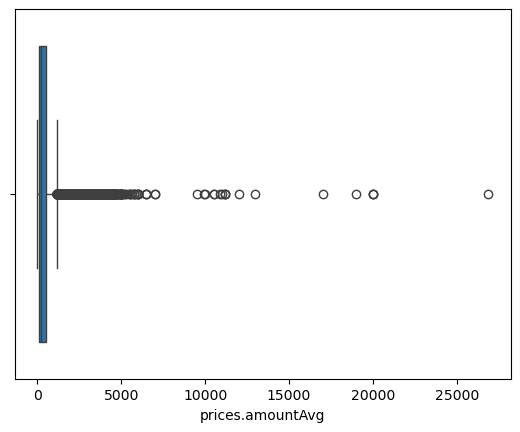

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_eda['prices.amountAvg'])
plt.show()


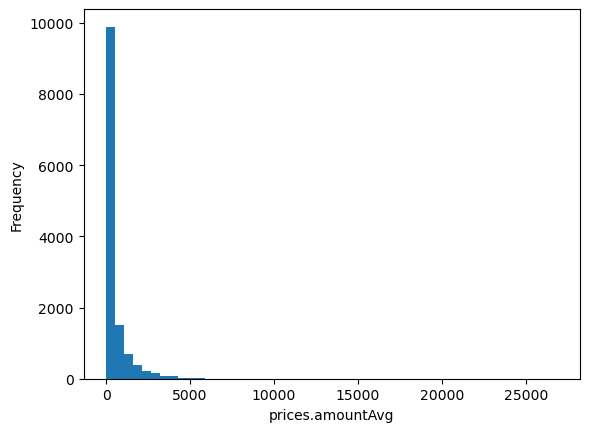

In [12]:
plt.hist(df_eda['prices.amountAvg'], bins=50)
plt.xlabel('prices.amountAvg')
plt.ylabel('Frequency')
plt.show()


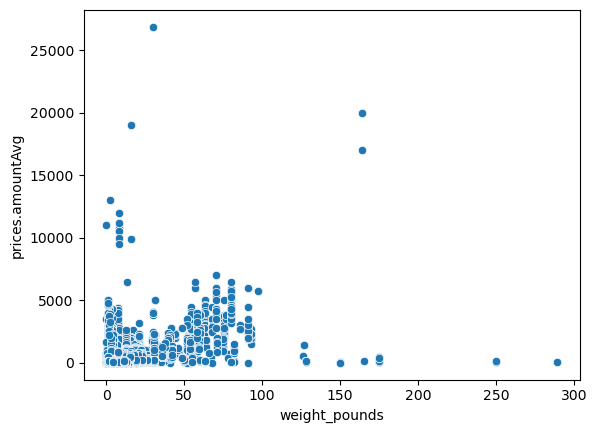

In [13]:
sns.scatterplot(x=df_eda['weight_pounds'], y=df_eda['prices.amountAvg'])
plt.show()


In [14]:
#Log Transformation: Apply a log transformation to reduce the impact of outliers - average price
df_eda['prices.amountAvg'] = np.log1p(df_eda['prices.amountAvg'])


In [15]:
#Log Transformation: Apply a log transformation to reduce the impact of outliers - weight
df_eda['weight_pounds'] = np.log1p(df_eda['weight_pounds'])

In [16]:
df_eda

id prices.availability prices.condition  \
0      AVphzgbJLJeJML43fA0o            In Stock              New   
1      AVpgMuGwLJeJML43KY_c            In Stock              New   
2      AVpgMuGwLJeJML43KY_c            In Stock              New   
3      AVpgMuGwLJeJML43KY_c            In Stock              New   
4      AVpgMuGwLJeJML43KY_c            In Stock              New   
...                     ...                 ...              ...   
13079  AVpgibRDLJeJML43PTZX            In Stock              New   
13080  AVpgibRDLJeJML43PTZX            In Stock              New   
13081  AVpgibRDLJeJML43PTZX            In Stock              New   
13082  AVpgibRDLJeJML43PTZX            In Stock              New   
13083  AVpgibRDLJeJML43PTZX            In Stock              New   

      prices.currency      prices.dateSeen  prices.isSale  \
0                 USD  2018-05-26 15:00:00          False   
1                 USD  2017-12-14 06:00:00           True   
2                 USD  2017-09-08 05:00:00          False   
3                 USD  2017-10-10 05:00:00          False   
4                 USD  2017-08-28 07:00:00          False   
...               ...                  ...            ...   
13079             USD  2015-10-18 00:00:00          False   
13080             USD  2017-12-14 06:00:00          False   
13081             USD  2018-05-26 15:00:00          False   
13082             USD  2018-03-05 11:00:00          False   
13083             USD  2015-12-05 00:00:00          False   

                     prices.merchant prices.shipping    brand  \
0                        Bestbuy.com         unknown    Sanus   
1                        Walmart.com       Expedited  Boytone   
2                        Walmart.com       Expedited  Boytone   
3                        Bestbuy.com         unknown  Boytone   
4                        Bestbuy.com         unknown  Boytone   
...                              ...             ...      ...   
13079  Beach Audio Inc - Walmart.com         unknown     naxa   
13080                    Walmart.com        Standard     naxa   
13081                    Bestbuy.com         unknown     naxa   
13082                    Walmart.com        Standard     naxa   
13083  Beach Audio Inc - Walmart.com         unknown     naxa   

                                              categories  ... DVDBurners  \
0      Audio&VideoAccessories,TVMounts,TVAccessories&...  ...          0   
1      Stereos,PortableBluetoothSpeakers,TV,Video&Hom...  ...          0   
2      Stereos,PortableBluetoothSpeakers,TV,Video&Hom...  ...          0   
3      Stereos,PortableBluetoothSpeakers,TV,Video&Hom...  ...          0   
4      Stereos,PortableBluetoothSpeakers,TV,Video&Hom...  ...          0   
...                                                  ...  ...        ...   
13079  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   
13080  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   
13081  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   
13082  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   
13083  TVs&Electronics,Computers,HomeTheater&Audio,Co...  ...          0   

      Ipods&Mp3Players SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...  \
0                    0                                                  0   
1                    0                                                  0   
2                    0                                                  0   
3                    0                                                  0   
4                    0                                                  0   
...                ...                                                ...   
13079                0                                                  0   
13080                0                                                  0   
13081                0                                                  0   
13082      

Univariate - Numerical Analysis

In [17]:
df_eda.describe()

weight_pounds  prices.amountAvg  Audio&VideoAccessories      TVMounts  \
count   13084.000000      13084.000000            13084.000000  13084.000000   
mean        2.020654          5.381773                0.032330      0.008101   
std         1.058383          1.284379                0.176881      0.089646   
min         0.000000          0.693147                0.000000      0.000000   
25%         1.163151          4.394326                0.000000      0.000000   
50%         2.001480          5.293305                0.000000      0.000000   
75%         2.602690          6.234396                0.000000      0.000000   
max         5.669881         10.198840                1.000000      1.000000   

       TVAccessories&Parts   Electronics  A/VPresentation  \
count         13084.000000  13084.000000     13084.000000   
mean              0.009095      0.970116         0.002293   
std               0.094937      0.170273         0.047831   
min               0.000000      0.000000         0.000000   
25%               0.000000      1.000000         0.000000   
50%               0.000000      1.000000         0.000000   
75%               0.000000      1.000000         0.000000   
max               1.000000      1.000000         1.000000   

       Accessories&Supplies  TVCeiling&WallMounts       Stereos  ...  \
count          13084.000000          13084.000000  13084.000000  ...   
mean               0.029884              0.009095      0.113956  ...   
std                0.170273              0.094937      0.317770  ...   
min                0.000000              0.000000      0.000000  ...   
25%                0.000000              0.000000      0.000000  ...   
50%                0.000000              0.000000      0.000000  ...   
75%                0.000000              0.000000      0.000000  ...   
max                1.000000              1.000000      1.000000  ...   

         DVDBurners  Ipods&Mp3Players  \
count  13084.000000      13084.000000   
mean       0.001758          0.001987   
std        0.041892          0.044535   
min        0.000000          0.000000   
25%        0.000000          0.000000   
50%        0.000000          0.000000   
75%        0.000000          0.000000   
max        1.000000          1.000000   

       SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...  \
count                                       13084.000000    
mean                                            0.001376    
std                                             0.037067    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             1.000000    

       SeemoreUltimateEarsBOOM2PhantomPortableSpeaker...  \
count                                       13084.000000   
mean                                            0.000611   
std                                             0.024721   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       SeemoreSamsungLevelUProActiveNoiseCancellingWi...  \
count                                       13084.000000   
mean                                            0.001223   
std                                             0.034949   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       SeemoreJBLGX9633-Way6in.x9in.Speaker  BusinessLaptopPCs  \
count              

In [18]:
#kurtois and skewness
print('Kurtosis:', df_eda['prices.amountAvg'].kurt())
print('Skewness:', df_eda['prices.amountAvg'].skew())


Kurtosis: -0.26874546699683455
Skewness: 0.18591809797195596


In [44]:
#kurtois and skewness
print('Kurtosis:', df_eda['weight_pounds'].kurt())
print('Skewness:', df_eda['weight_pounds'].skew())

Kurtosis: -0.4952984510081593
Skewness: 0.21171516258152961


C:\Users\fjkha\AppData\Local\Temp\ipykernel_22436\3118063673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda['prices.amountAvg'])


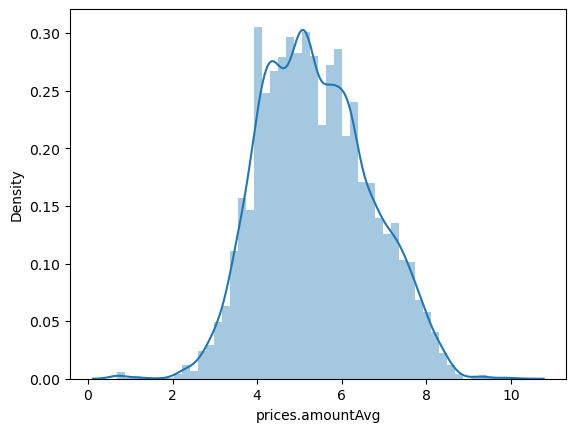

In [19]:
#plot the distribution of 'prices.amountAvg'
sns.distplot(df_eda['prices.amountAvg'])
plt.show()


C:\Users\fjkha\AppData\Local\Temp\ipykernel_22436\1770265473.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda['weight_pounds'])


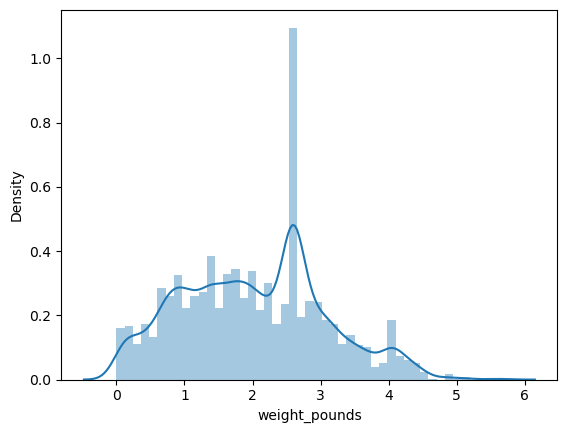

In [20]:
#plot the distribution of 'weight_pounds'
sns.distplot(df_eda['weight_pounds'])
plt.show()

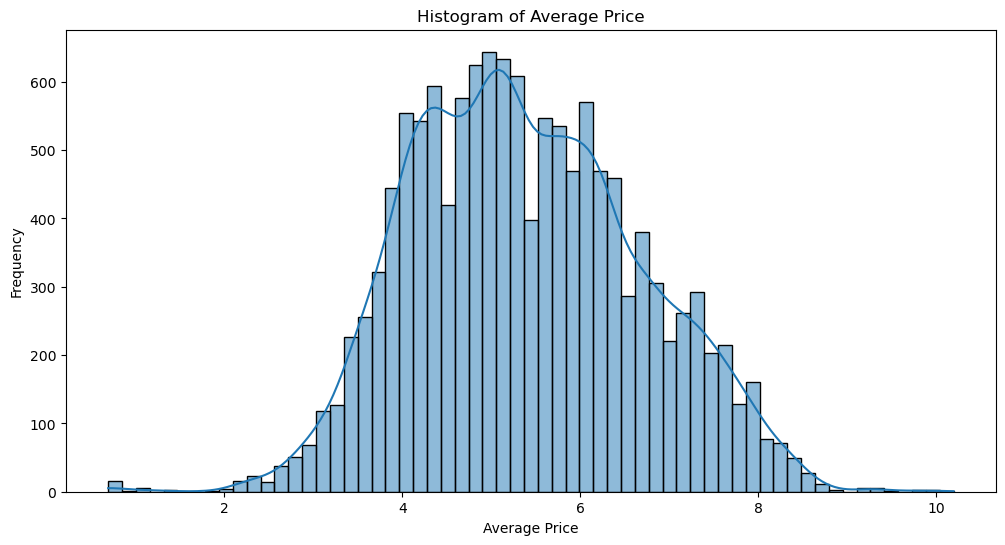

In [21]:
#Distribution Plots: Use histograms, KDE plots, or box plots to understand the distribution.
#Histogram of the 'prices.amountAvg' column
plt.figure(figsize=(12, 6))
sns.histplot(df_eda['prices.amountAvg'], kde=True)
plt.title('Histogram of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

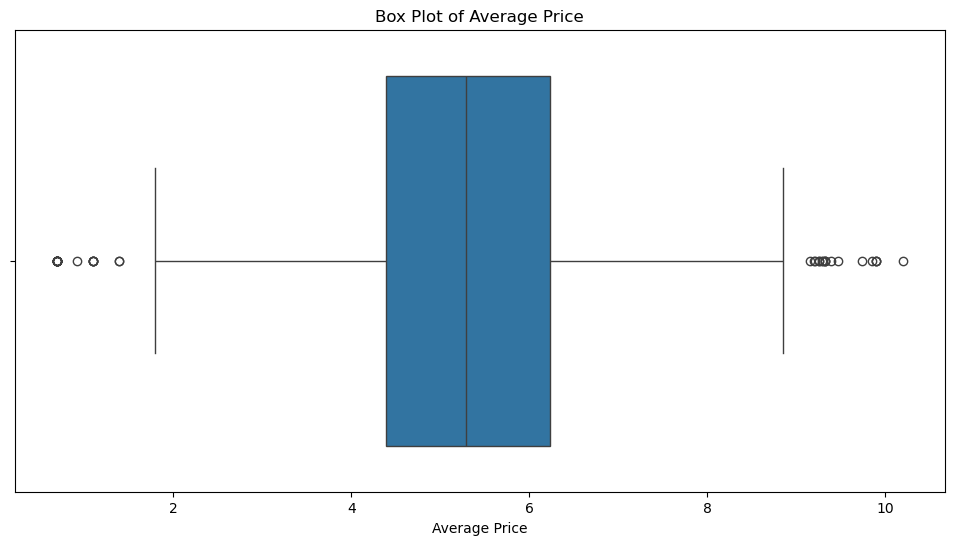

In [22]:
#Outlier Detection: Use box plots or Z-score analysis to identify outliers.
#Box plot of the 'prices.amountAvg' column
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_eda['prices.amountAvg'])
plt.title('Box Plot of Average Price')
plt.xlabel('Average Price')
plt.show()

Univariate - Categorical Analysis

In [23]:
#Frequency distribution of the 'primaryCategories' column
df_eda['primaryCategories'].value_counts()


primaryCategories
Electronics              13007
Electronics,Furniture       31
 Apple CarPlay              27
 Intel Celeron              12
 Siri Eyes Free              6
Electronics,Media            1
Name: count, dtype: int64

In [24]:
#Frequency distribution of the 'brand' column
df_eda['brand'].value_counts()

brand
Sony              1500
Samsung           1202
Apple              981
Pioneer            292
Yamaha             288
                  ... 
Audio-Technica       1
Soundcast            1
j5create             1
Pro-Ject             1
HyperX               1
Name: count, Length: 309, dtype: int64

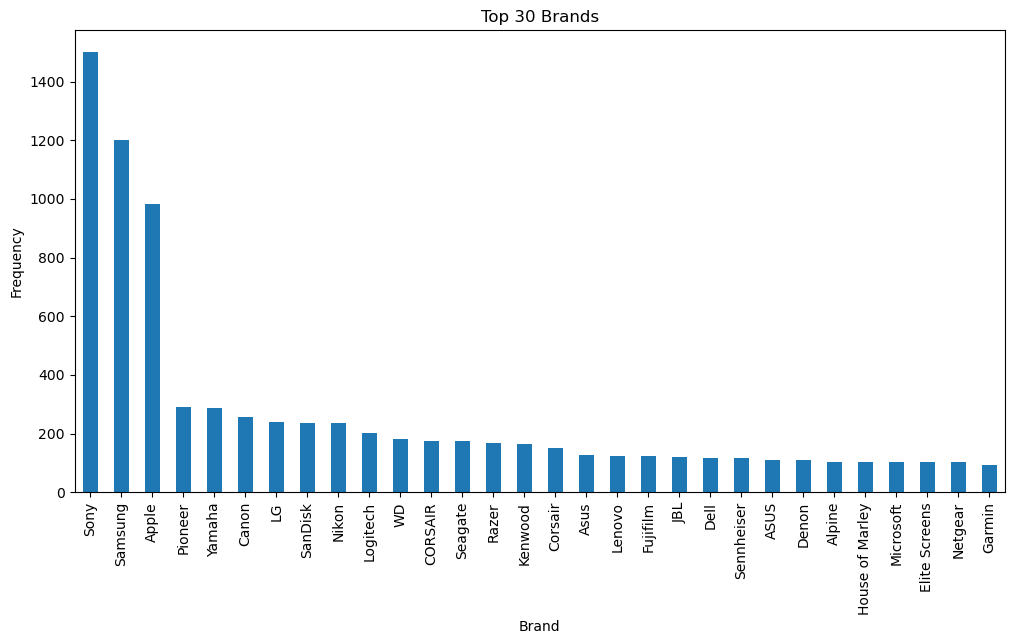

In [25]:
#Bar Plots: Visualize the distribution of brand limit to top 20 in descending order using bar plot
plt.figure(figsize=(12, 6))
df_eda['brand'].value_counts().head(30).plot(kind='bar')
plt.title('Top 30 Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()



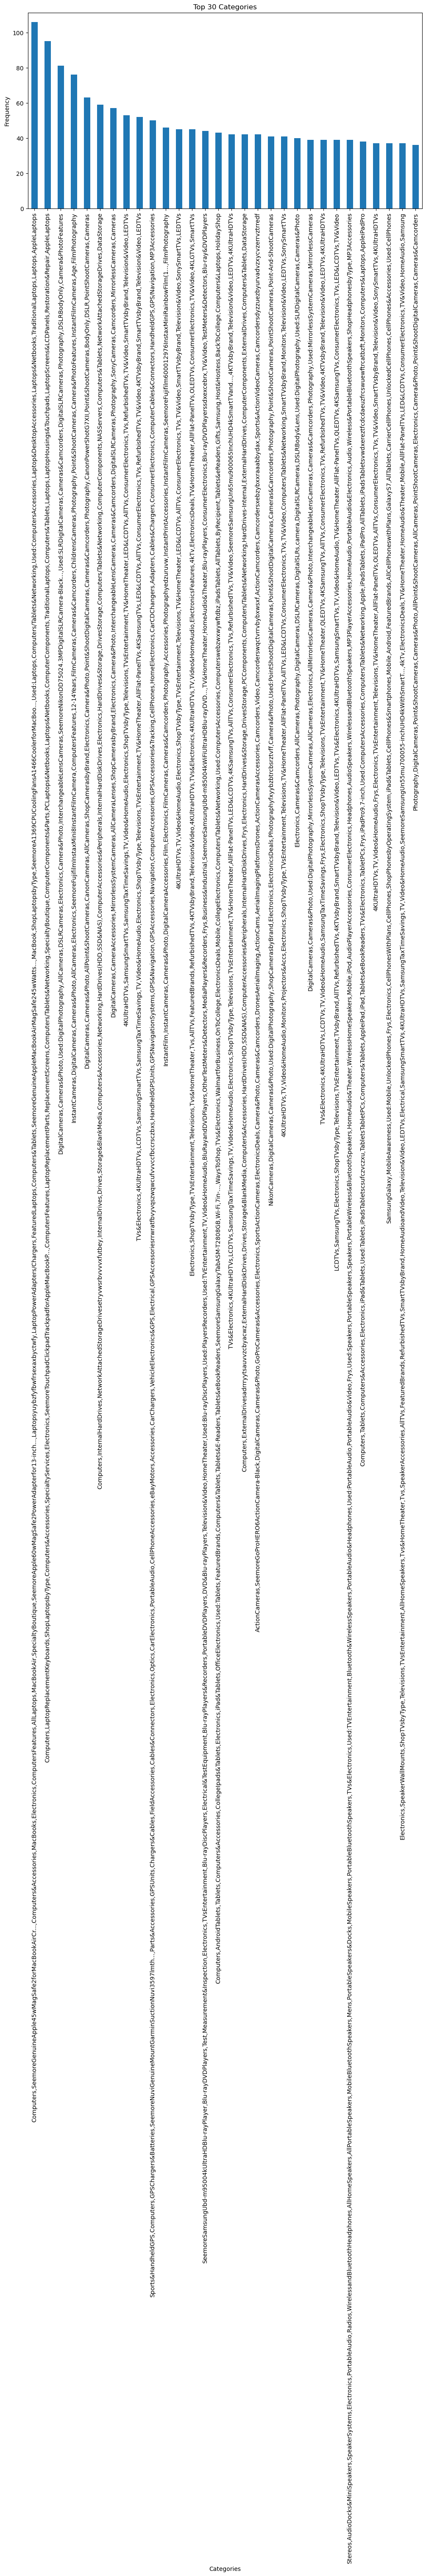

In [26]:
#Bar Plots: Visualize the distribution of 'categories' column
plt.figure(figsize=(12, 6))
df_eda['categories'].value_counts().head(30).plot(kind='bar')
plt.title('Top 30 Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()


Multivariate Analysis - Numerical vs Numerical

In [27]:
#split df_eda into categorical and numerical columns for EDA analysis
categorical_columns = df_eda.select_dtypes(include=['object']).columns
numerical_columns = df_eda.select_dtypes(include=['float64', 'int64']).columns


In [28]:
#Correlation Matrix: Use a correlation matrix to understand the relationships between numerical features.
#Correlation matrix of numerical columns
#plt.figure(figsize=(12, 6))
#sns.heatmap(df_eda[numerical_columns].corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()



The graph suggest a moderate significance between weight and price.  As weight increases, so does price, but the correlation is not strong enough and needs to be coupled with more attributes for modelling. 

Multivariate - Numerical vs. Categorical:


In [30]:
#Box plot of 'prices.amountAvg' vs 'prices.condition' using plotly.graph_objects
fig = go.Figure()
fig.add_trace(go.Box(x=df_eda['prices.condition'], y=df_eda['prices.amountAvg'], boxmean='sd'))
fig.update_layout(title='Box Plot of Average Price by Condition', xaxis_title='Condition', yaxis_title='Average Price')
fig.show()
#Violin Plots: Similar to box plots but also show the distribution density.
#Groupby Analysis: Use groupby to aggregate numerical data based on categories and compute summary statistics (mean, median, etc.).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Bestbuy.com'),
  Text(1, 0, 'bhphotovideo.com'),
  Text(2, 0, 'Walmart.com'),
  Text(3, 0, 'Beach Camera'),
  Text(4, 0, 'AMI Ventures Inc'),
  Text(5, 0, 'buydig'),
  Text(6, 0, 'Focus Camera'),
  Text(7, 0, 'Best Buy'),
  Text(8, 0, 'Beach Audio Inc'),
  Text(9, 0, 'echo-and-optics'),
  Text(10, 0, 'World Wide Stereo'),
  Text(11, 0, 'Newegg'),
  Text(12, 0, 'UnbeatableSale'),
  Text(13, 0, 'BuyVPC'),
  Text(14, 0, 'DealClock'),
  Text(15, 0, 'gear4less'),
  Text(16, 0, 'Electronics Expo (Authorized Dealer)'),
  Text(17, 0, 'OneCall'),
  Text(18, 0, 'electronic_express'),
  Text(19, 0, 'pcRUSH - Walmart.com')])

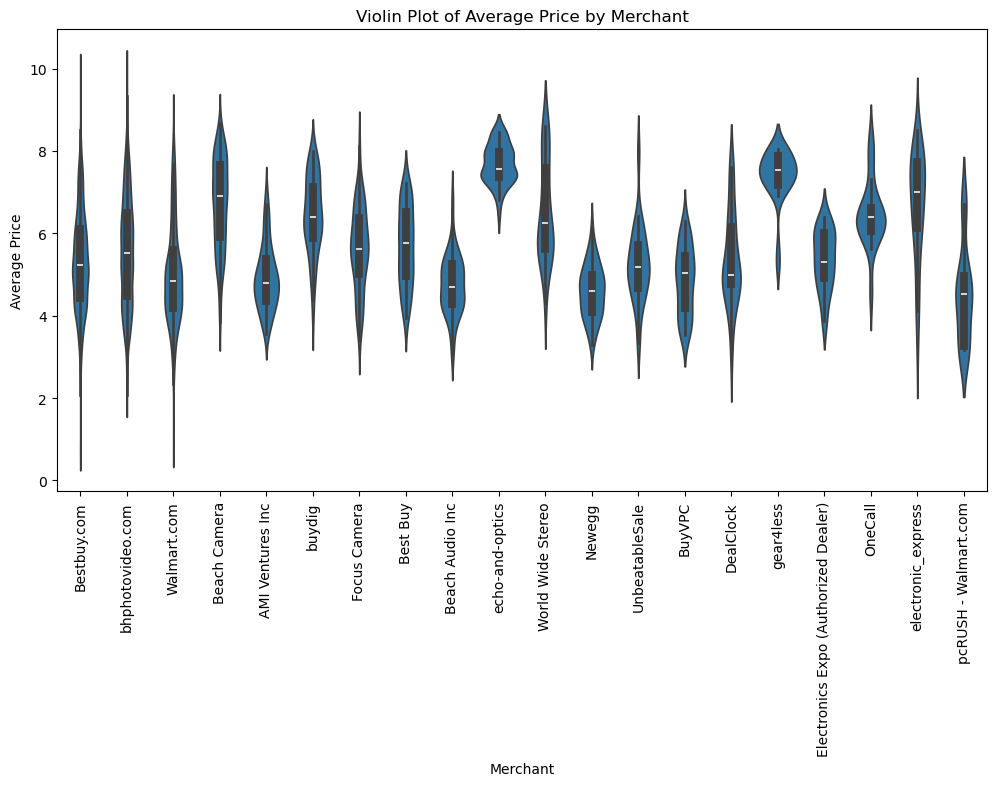

In [31]:
#Violin plot of 'prices.amountAvg' vs 'merchant' in descending order limited to top 20 merchants
plt.figure(figsize=(12, 6))
sns.violinplot(x='prices.merchant', y='prices.amountAvg', data=df_eda, order=df_eda['prices.merchant'].value_counts().iloc[:20].index)
plt.title('Violin Plot of Average Price by Merchant')
plt.xlabel('Merchant')
plt.ylabel('Average Price')
plt.xticks(rotation=90)


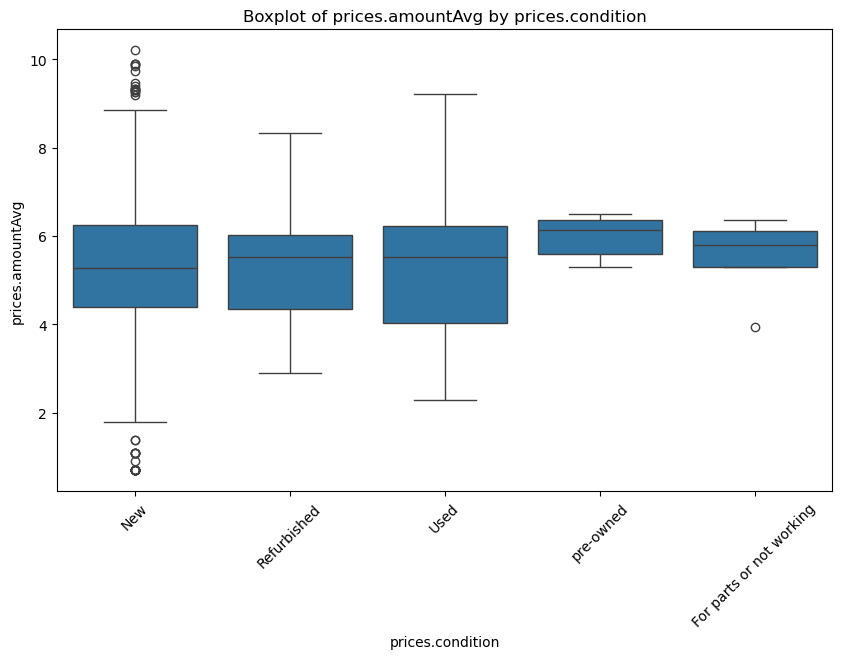

In [32]:
#boxplot on prices.amountAvg column
plt.figure(figsize=(10, 6))
sns.boxplot(x='prices.condition', y='prices.amountAvg', data=df_eda)
plt.title('Boxplot of prices.amountAvg by prices.condition')
plt.xticks(rotation=45)
plt.show()

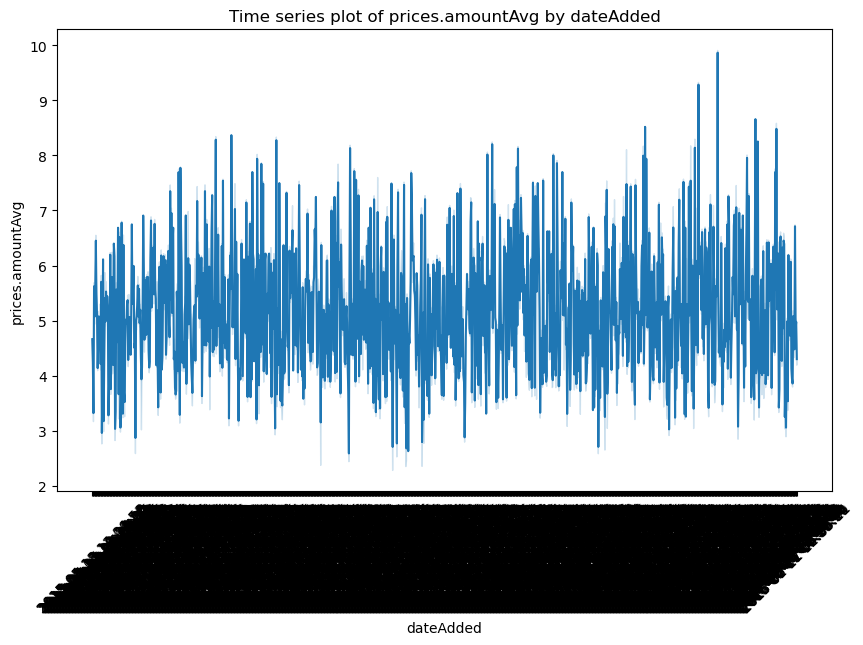

In [33]:
#time series plot of prices.amountAvg by dateAdded
plt.figure(figsize=(10, 6))
sns.lineplot(x='dateAdded', y='prices.amountAvg', data=df_eda)
plt.title('Time series plot of prices.amountAvg by dateAdded')
plt.xticks(rotation=45)
plt.show()

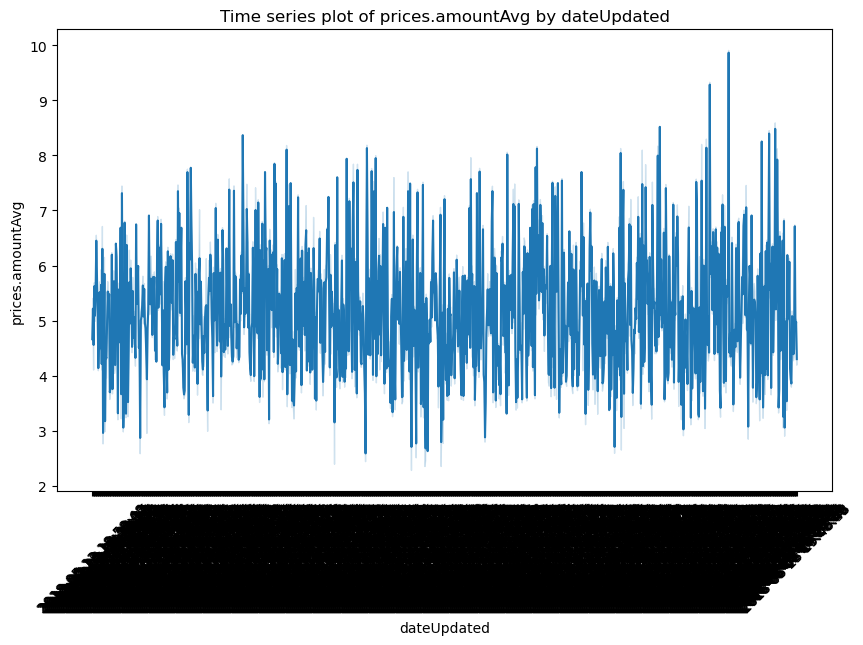

In [34]:
#time series plot of prices.amountAvg by dateUpdated
plt.figure(figsize=(10, 6))
sns.lineplot(x='dateUpdated', y='prices.amountAvg', data=df_eda)
plt.title('Time series plot of prices.amountAvg by dateUpdated')
plt.xticks(rotation=45)
plt.show()

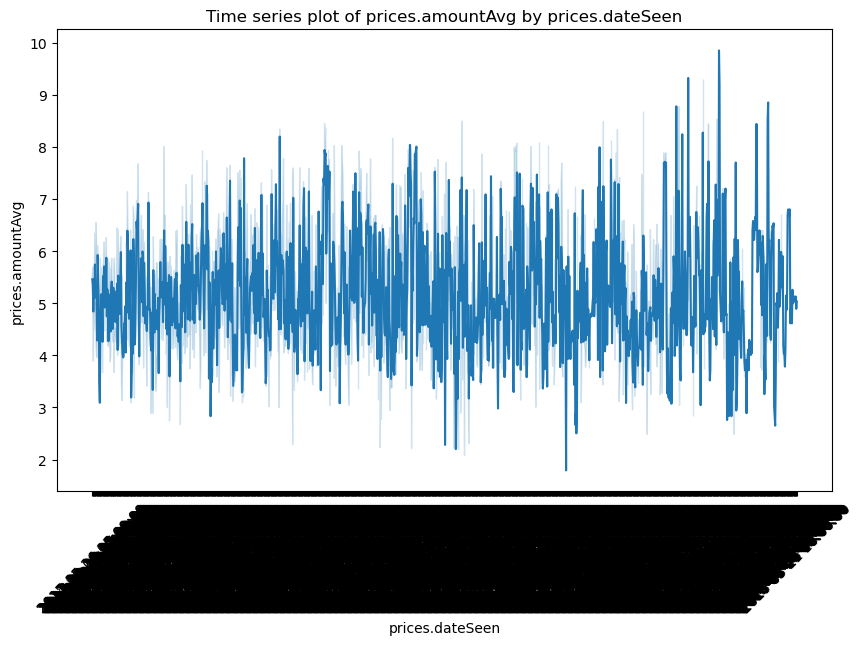

In [35]:
#time series plot of prices.amountAvg by prices.dateSeen
plt.figure(figsize=(10, 6))
sns.lineplot(x='prices.dateSeen', y='prices.amountAvg', data=df_eda)
plt.title('Time series plot of prices.amountAvg by prices.dateSeen')
plt.xticks(rotation=45)
plt.show()

Multivariate analysis - Categorical VS Categorical

In [36]:
# chi-square test for categorical columns merchant and condition
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_eda['prices.merchant'], df_eda['prices.condition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square test statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)



Chi-square test statistic: 30779.886144630378
P-value: 0.0
Degrees of freedom: 5484
Expected frequencies: [[3.82146133e-04 9.47340263e-01 1.74258637e-02 3.43167227e-02
  5.35004586e-04]
 [3.82146133e-04 9.47340263e-01 1.74258637e-02 3.43167227e-02
  5.35004586e-04]
 [3.82146133e-04 9.47340263e-01 1.74258637e-02 3.43167227e-02
  5.35004586e-04]
 ...
 [3.82146133e-04 9.47340263e-01 1.74258637e-02 3.43167227e-02
  5.35004586e-04]
 [3.82146133e-04 9.47340263e-01 1.74258637e-02 3.43167227e-02
  5.35004586e-04]
 [3.82146133e-04 9.47340263e-01 1.74258637e-02 3.43167227e-02
  5.35004586e-04]]


In [37]:
# Generating a multivariate crosstab for all categorical columns
for i in range(0, len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        cross_tab = pd.crosstab(df_eda[categorical_columns[i]], df_eda[categorical_columns[j]])
        print(cross_tab)
        print('\n\n')

prices.availability   In Stock  More on the Way  Out of Stock  Special Order
id                                                                          
AV-pPOFauC1rwyj_ghHT         3                0             0              0
AV0-JbjHvKc47QAVgW-C        10                0             0              0
AV00ozTAvKc47QAVgAJM         6                0             0              0
AV01QNi7vKc47QAVgEEV        21                1             0              0
AV01UxMTglJLPUi8Hmm4        19                0             0              0
...                        ...              ...           ...            ...
AWOpLyzrHh53nbDRKmTD         6                0             0              0
AWOpMDbqYSSHbkXw06lc         2                0             0              0
AWOpOCd2YSSHbkXw07ei         2                0             0              0
AWOpWM18YSSHbkXw09Yj         1                0             0              0
AWOpqvXyIwln0LfXnC65         2                0             0              0

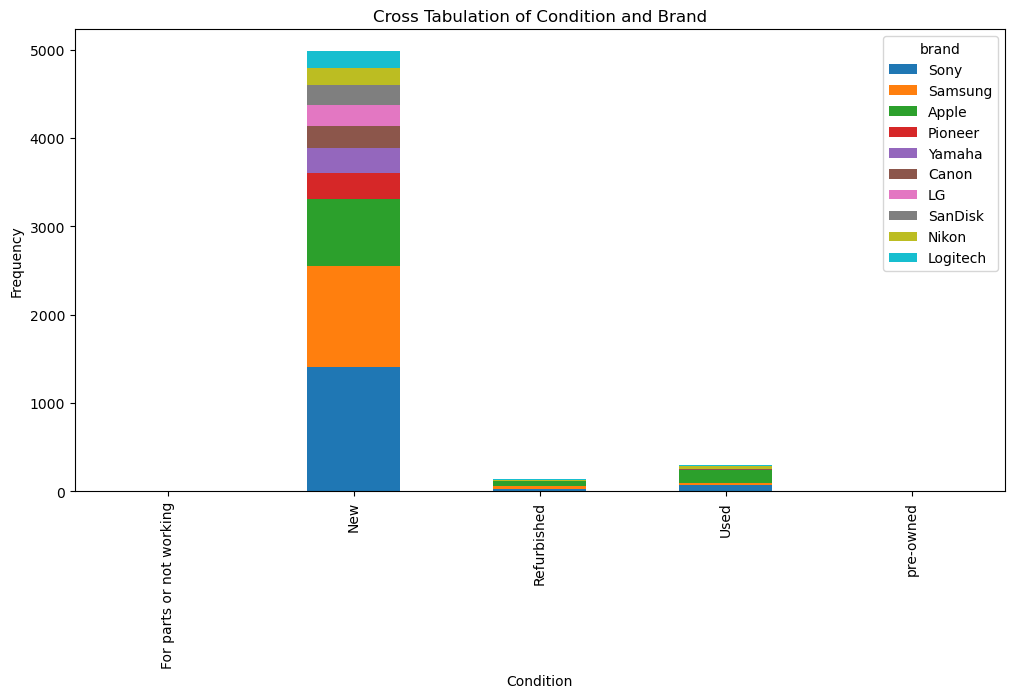

In [38]:
# Plotting the results for 'cross_tab' data for columns 'prices.condition' and 'brand' limited to top 10 brands
cross_tab = pd.crosstab(df_eda['prices.condition'], df_eda['brand'])
cross_tab = cross_tab.loc[:, cross_tab.sum().sort_values(ascending=False).index[:10]]
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cross Tabulation of Condition and Brand')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()


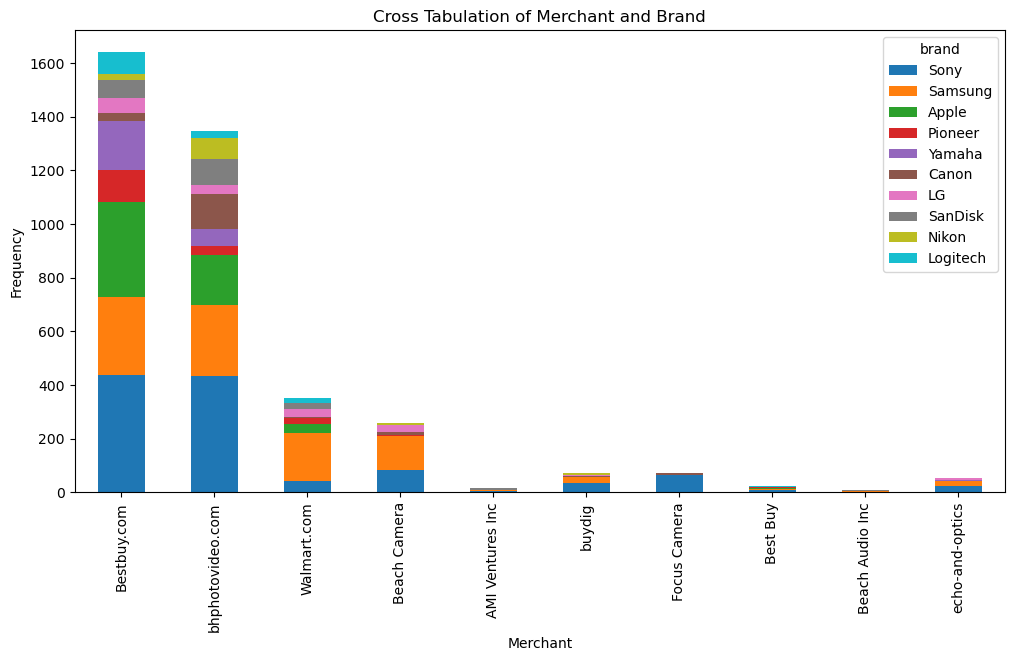

In [39]:
# Plotting the results for 'cross_tab' data for columns 'merchant' and 'brand' limited to top 10 merchants and brands
cross_tab = pd.crosstab(df_eda['prices.merchant'], df_eda['brand'])
cross_tab = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index[:10], cross_tab.sum().sort_values(ascending=False).index[:10]]
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cross Tabulation of Merchant and Brand')
plt.xlabel('Merchant')
plt.ylabel('Frequency')
plt.show()


In [40]:
#chi-square test on all categorical columns and display the results for each pair of columns
#for i in range(0, len(categorical_columns)):
    #for j in range(i+1, len(categorical_columns)):
        #contingency_table = pd.crosstab(df_eda[categorical_columns[i]], df_eda[categorical_columns[j]])
        #chi2, p, dof, expected = chi2_contingency(contingency_table)
        #print('Chi-square test statistic for', categorical_columns[i], 'and', categorical_columns[j], ':', chi2)
        #print('P-value:', p)
        #print('Degrees of freedom:', dof)
        #print('Expected frequencies:', expected)
        #print('\n\n')

In [41]:
#Visualize the chi-square test on all categorical columns using a heatmap
chi2_results = np.zeros((len(categorical_columns), len(categorical_columns)))
p_values = np.zeros((len(categorical_columns), len(categorical_columns)))

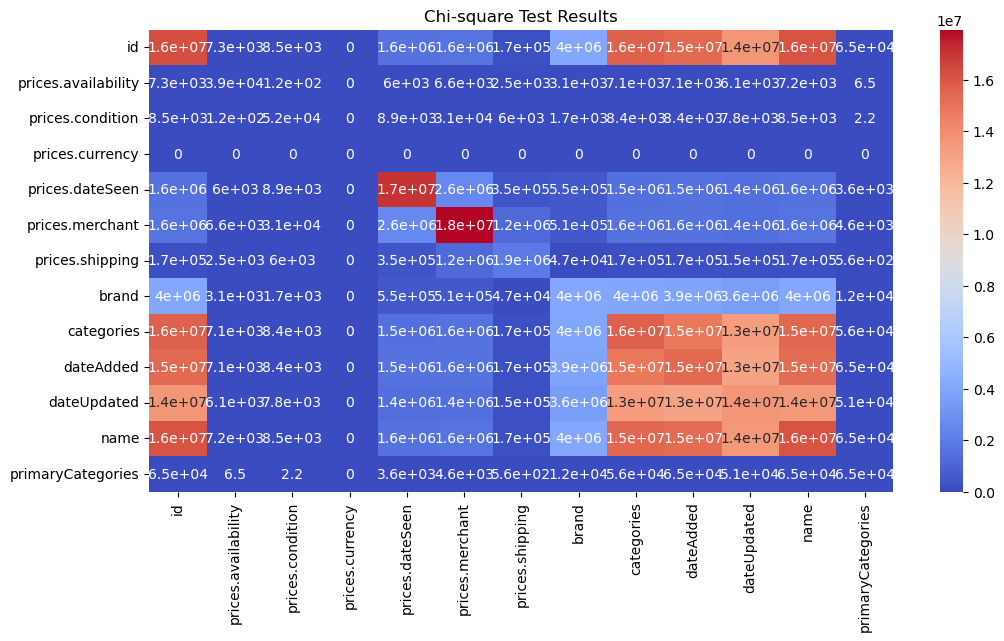

In [42]:
for i in range(0, len(categorical_columns)):
    for j in range(0, len(categorical_columns)):
        contingency_table = pd.crosstab(df_eda[categorical_columns[i]], df_eda[categorical_columns[j]])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results[i, j] = chi2
        p_values[i, j] = p
plt.figure(figsize=(12, 6))
sns.heatmap(chi2_results, annot=True, xticklabels=categorical_columns, yticklabels=categorical_columns, cmap='coolwarm')
plt.title('Chi-square Test Results')
plt.show()

In [43]:
#Check for the distribution of the data
fig = px.histogram(df_eda, x='brand')
fig.show()